# Introduction

The bigger the internet community grows, the louder the cry for rules and regulations. 
The online world as become a legit social space with real people acting upon real problems and issues. 
Although the internet has perpetuated globalization and democratized a lot of domains, like education, it bears a wide range of threats to its users. 

One particular issue are so called *trolls* - people with or without fake accounts whose mere goal is to provoke and bite down on other people, all while systematically undermining the ongoing discussions. 

They do so by hate comments filled with hate, threat, insults and other types of toxicity that aim to hurt and isolate. 

"*If you want to feel shit about the state of the world and everyone in it, Facebook comments are a great place to start.*" 
a [LinkedIn](https://www.linkedin.com/pulse/why-internet-comments-so-toxic-kiera-tsenti/) article states.

How is it possible, though, that the very democratic element of the internet - the **comment section** - has become such a tool of cruelty? 

[Tauriq Moosa](https://www.theguardian.com/science/brain-flapping/2014/sep/12/comment-sections-toxic-moderation) describes the intellectual deposit of trolls as plain poison:
"*It sits there like an ugly growth beneath articles, bloated and throbbing with vitriol. It groans as hatred expands its force, waiting for any point of dissent to break it – to unleash its full fury on targets who dare convey some measure of civility or dissent (if you want almost guaranteed hate, be a woman).*"

Is this what it comes down to, when you give humanity anonymity and release them from their social weight?


Ms. Papacharissi, a professor of communication at the University of Illinois-Chicago who teaches social media courses [said](https://www.nytimes.com/2018/08/08/technology/personaltech/internet-trolls-comments.html) that in her 20 years of researching concludes that people use the internet to get more of what they do not get enough of in their everyday life. So while people have been socialized to resist being impulsive in the real world, on the internet they cave to their temptations to lash out. 

It’s up to the content providers and tech platforms to oversee their communities' activity and set rules and standards for civilized discussion. However, it is hardly to overlook the recources this would take. Comment sections often are left unsupervised. The Author if the New York Times article calls out even another central problem: tech companies like Facebook and Twitter struggle, because they have long portrayed themselves as neutral platforms that do not wish to take on the editorial roles of traditional publishers. 

Even the number one internet culture curator [*WIRED*](https://www.wired.com/2017/08/internet-troll-map/) magazine wipes the slates clean, by stating: 
> **INTERNET RULE #1: Never read the comments.**

What now?

What presumably can't be solved through policy making and social psychological interventions, has once again been given into the hands of Artificial Intelligence. Data Scientist are tirelessly working on new algorithms that identify toxic comments correctly. These algorithms enable *natural language processing* and making classifying, even predicting language content and specific sentiments like hate. 

# What kind of data are we dealing with?

The primary data for the competition is, in each provided file, the comment_text column. 
This contains the text of a comment which has been classified as toxic or non-toxic (0...1 in the toxic column). 
The train set’s comments are entirely in english and come either from Civil Comments or Wikipedia talk page edits. 
The test data's comment_text columns are composed of multiple non-English languages.

The *-train.csv files* and validation.csv file also contain a toxic column that is the target to be trained on.

The jigsaw-toxic-comment-train.csv and jigsaw-unintended-bias-train.csv contain training data (comment_text and toxic) from the two previous Jigsaw competitions, as well as additional columns that you may find useful.

*-seqlen128.csv files* contain training, validation, and test data that has been processed for input into BERT.

**What is BERT?**

**Bidirectional Encoder Representations from Transformers (BERT)** is a technique for NLP (Natural Language Processing) pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google. Google is leveraging BERT to better understand user searches.

The original English-language BERT model used two corpora in pre-training: BookCorpus and English Wikipedia.

# Meta Data

| Variable | Definition                                                                             | Type        |
|:----------|:--------------------------------------------|-------------|
|comment_text| Comments collected on CivilComments | String|
|toxic|
|severe_toxicity|
|obscene|
|identity_attack|
|insult|
|threat|
|asian|
|atheist|
|bisexual|
|black|
|buddhist|
|christian|
|female|
|heterosexual|
|hindu|
|homosexual_gay_or_lesbian|
|intellectual_or_learning_disability|
|jewish| 
|latino| 
|male|
|muslim|
|other_disability|
|other_gender|
|other_race_or_ethnicity|
|other_religion|
|other_sexual_orientation|
|physical_disability|
|psychiatric_or_mental_illness|
|transgender| 
|white|
|created_date|
|rating| 
|funny| 
|wow| 
|sad|
|likes|
|disagree|
|sexual_explicit|
|identity_annotator_count|
|toxicity_annotator_count|

# Exploratory Data Analysis

Exploratory data analysis is a critical phase in the data science process. We will take a thorough look through the data to discover patterns in the data, form hypotheses, and gather insights. Additionally, I am going to display key information in a visually appealing graphs for better understanding. 

In [1]:
#workflow and statistics
import pandas as pd
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt

#for showing missing values
import missingno as msno

#visualisation
import seaborn as sns

# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#natural language processing toolkit
import nltk
import string
from nltk.corpus import stopwords  # removes useless words
from nltk.stem.lancaster import LancasterStemmer  #converts the words to base form; aggressive
from nltk.stem import porter
from nltk.stem.util import suffix_replace, prefix_replace
from nltk.stem.api import StemmerI
from nltk.stem import SnowballStemmer

#create a wordcloud of often used words
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
nltk.download('stopwords')


#accessing google cloud storage
#from google.cloud import storage
#from io import BytesIO
#client = storage.Client()
#bucket = "bilderkennung_nf_2020"

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#  Data Import

Import the dataset in GCP: 

In [2]:
#train_data = pd.read_csv("gs://ja bilderkennung_nf_2020/data /jigsaw-toxic-comment-train.csv")

Import extended dataset for analysis purposes:

In [3]:
train_data = pd.read_csv("jigsaw-toxic-comment-train.csv")

In [4]:
train_data.shape

(223549, 8)

In [5]:
train_data.head(1)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0


In [6]:
test_data = pd.read_csv("./test.csv")

In [7]:
data = pd.read_csv("./jigsaw-unintended-bias-train.csv")

In [8]:
data.head(1)

,id,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4


In [9]:
np.transpose(data.describe())

,count,mean,std,min,25%,50%,75%,max
id,1902194.0,3.912771e+06,2.497349e+06,59848.0,827354.25,5282205.0,5.862735e+06,7194639.00
toxic,1902194.0,1.030068e-01,1.970813e-01,0.0,0.00,0.0,1.666667e-01,1.00
severe_toxicity,1902194.0,4.585531e-03,2.286902e-02,0.0,0.00,0.0,0.000000e+00,1.00
obscene,1902194.0,1.388516e-02,6.465998e-02,0.0,0.00,0.0,0.000000e+00,1.00
identity_attack,1902194.0,2.259572e-02,7.863447e-02,0.0,0.00,0.0,0.000000e+00,1.00
insult,1902194.0,8.117227e-02,1.760987e-01,0.0,0.00,0.0,9.090909e-02,1.00
threat,1902194.0,9.298498e-03,4.939469e-02,0.0,0.00,0.0,0.000000e+00,1.00
asian,426707.0,1.190451e-02,8.691443e-02,0.0,0.00,0.0,0.000000e+00,1.00
atheist,426707.0,3.362494e-03,5.164787e-02,0.0,0.00,0.0,0.000000e+00,1.00
bisexual,426707.0,1.896608e-03,2.625896e-02,0.0,0.00,0.0,0.000000e+00,1.00


In [10]:
data = data.drop('id', axis=1)

In [11]:
data = data.drop('publication_id', axis=1)

In [12]:
data = data.drop('parent_id', axis=1)

In [13]:
data.columns

Index(['comment_text', 'toxic', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree',
       'sexual_explicit', 'identity_annotator_count',
       'toxicity_annotator_count'],
      dtype='object')

In [14]:
data.shape

(1902194, 42)

The dataset has 1,902,194 data points and 42 features.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902194 entries, 0 to 1902193
Data columns (total 42 columns):
comment_text                           object
toxic                                  float64
severe_toxicity                        float64
obscene                                float64
identity_attack                        float64
insult                                 float64
threat                                 float64
asian                                  float64
atheist                                float64
bisexual                               float64
black                                  float64
buddhist                               float64
christian                              float64
female                                 float64
heterosexual                           float64
hindu                                  float64
homosexual_gay_or_lesbian              float64
intellectual_or_learning_disability    float64
jewish                                 flo

comment_text, created_date, rating are not numerical.

# Data Cleaning

Check for missing values in the data:

In [16]:
data.isnull().sum()

comment_text                                 0
toxic                                        0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1475487
atheist                                1475487
bisexual                               1475487
black                                  1475487
buddhist                               1475487
christian                              1475487
female                                 1475487
heterosexual                           1475487
hindu                                  1475487
homosexual_gay_or_lesbian              1475487
intellectual_or_learning_disability    1475487
jewish                                 1475487
latino                                 1475487
male                                   1475487
muslim       

Visualize missing data:

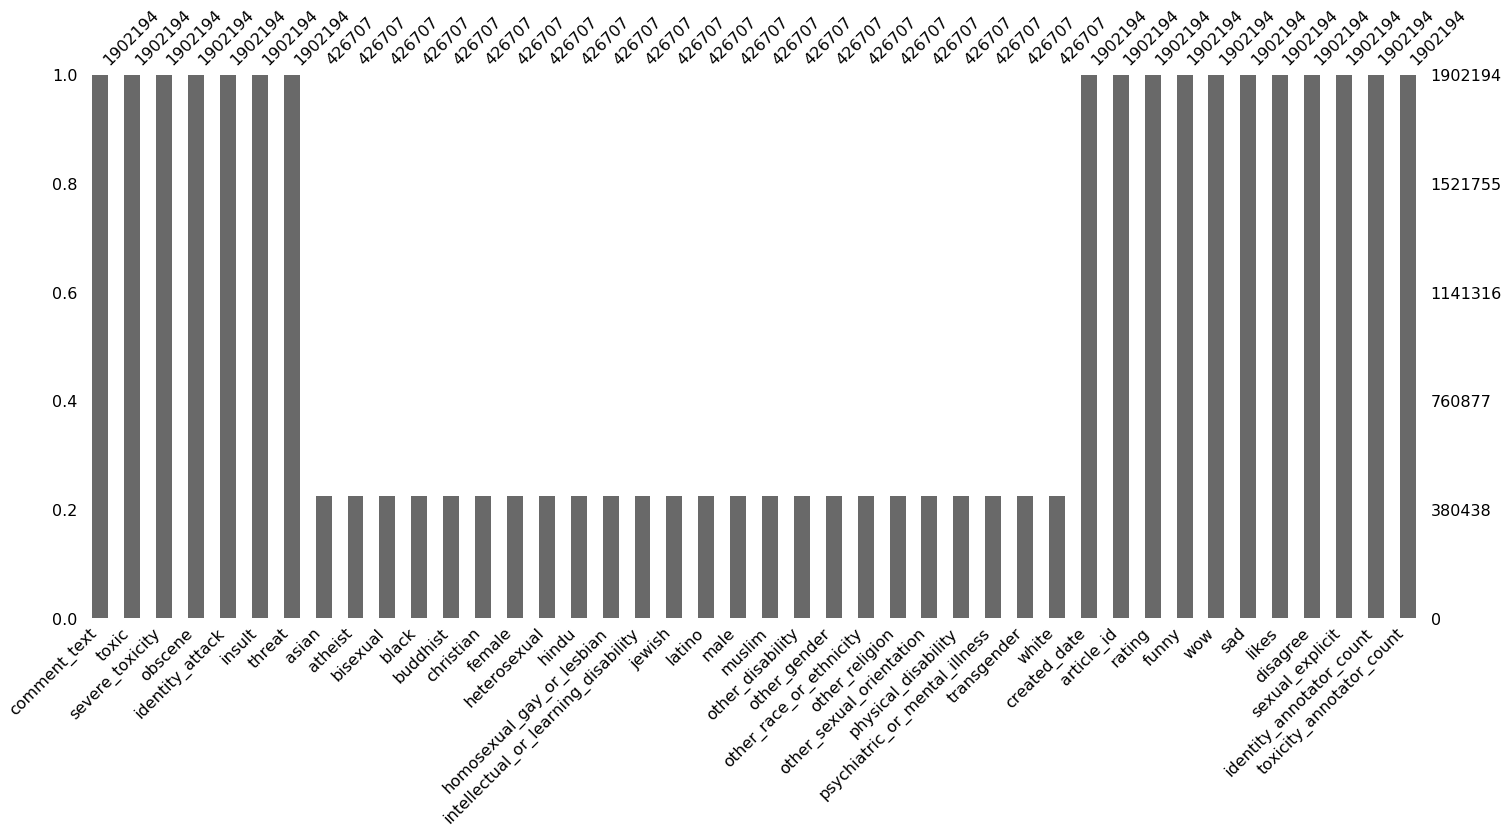

In [17]:
msno.bar(data);

What do we see in the bar chart above?

   + There is an equal amount of missing values in all of the identitiy features.

This may indicate that the type of identity hate has been evaluated only later on. However, it is more likely that two datasets have been joined. 

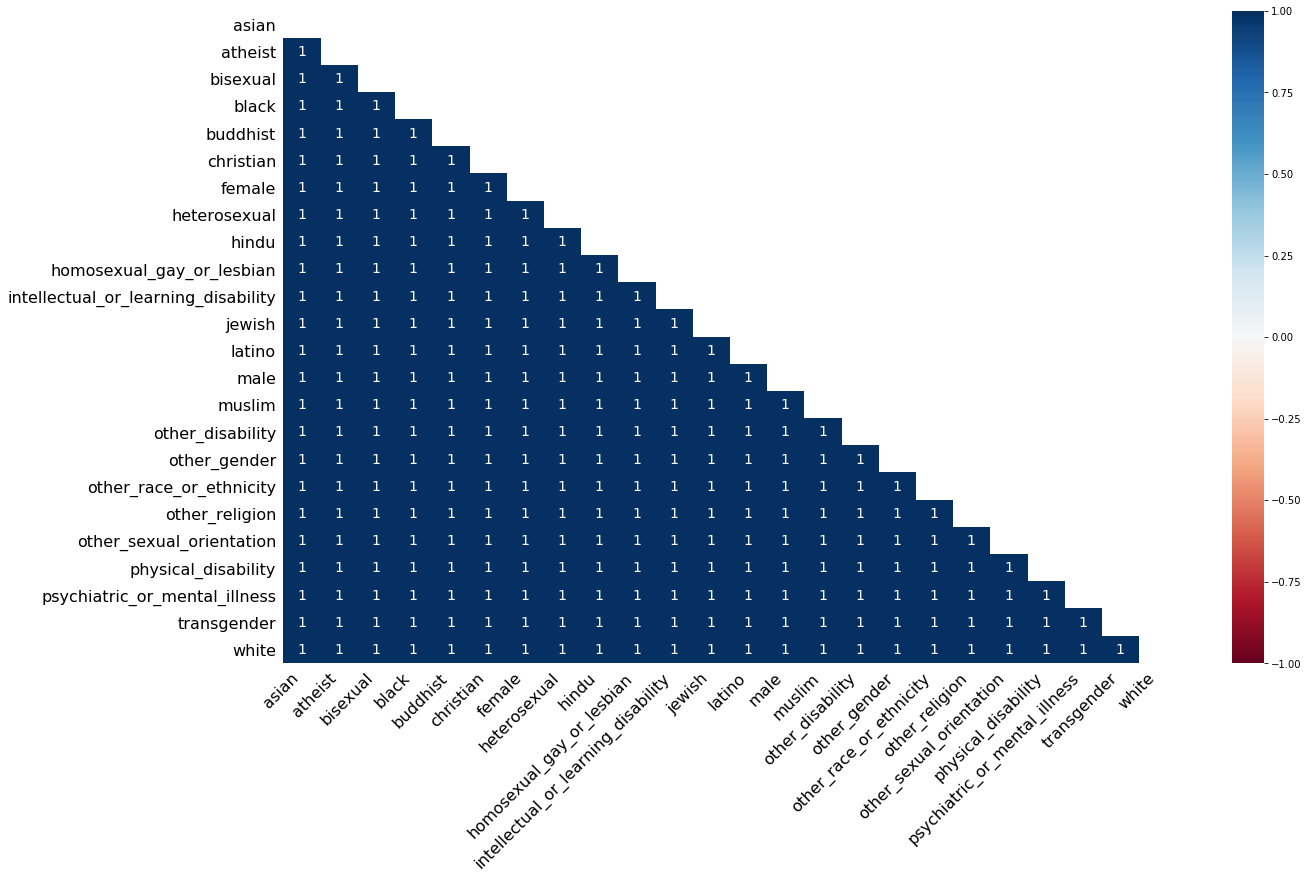

In [18]:
msno.heatmap(data);

The perfect value of 1 in the *missing values heatmap* confirms that if one identity feature is present the other identity features are also present, suggesting that they have been added at the same time. This is a systematic error, so just going with the 'complete cases analysis' and reducing the sample to complete cases won't do. Generally, tis ignorance runs on a high risk to reduce analysis precision significantly. 
<br/>
However, for this project I am going to drop all missing cases and create a subset for analysis purposes only. This subset still consists of 426,707 cases:

In [19]:
data2 = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [20]:
data2.shape

(426707, 42)

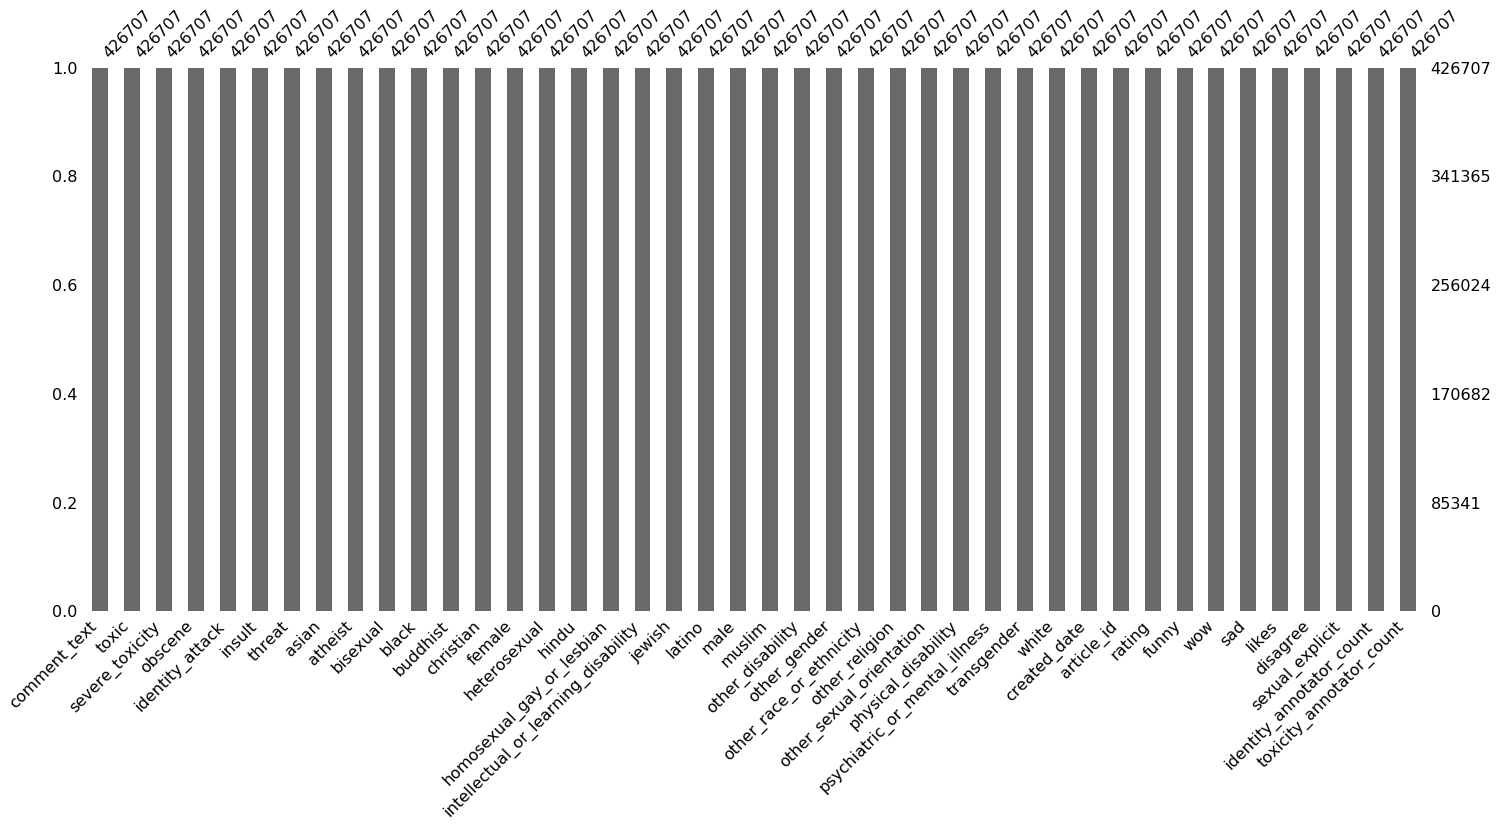

In [21]:
msno.bar(data2);

**Text Cleaning**

In [22]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
data2['comment_text'] = data2['comment_text'].apply(remove_punctuation)

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
sw=stopwords.words('english')
def removesw(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)
data2['comment_text'] = data2['comment_text'].apply(removesw)

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 
data2['comment_text'] = data2['comment_text'].apply(stemming)

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


# Feature Engineering

Create categorical variables of **Gender** identity:
+ female
+ male
+ transgender
+ other_gender 

In [25]:
# female 
data2['cat_female'] = 2
data2.loc[(data2['female'] >= 0.0) & (data2['female'] <= 0.5), 'cat_female'] = 0
data2.loc[(data2['female'] >= 0.5) & (data2['female'] <= 1.0), 'cat_female'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
data2['cat_female'].unique()

array([0, 1])

In [27]:
# male
data2['cat_male'] = 'zzz'
data2.loc[(data2['male'] >= 0.0) & (data2['male'] <= 0.5), 'cat_male'] = 0
data2.loc[(data2['male'] >= 0.5) & (data2['male'] <= 1.0), 'cat_male'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
# transgender
data2['cat_transgender'] = 2
data2.loc[(data2['transgender'] >= 0.0) & (data2['transgender'] <= 0.5), 'cat_transgender'] = 0
data2.loc[(data2['transgender'] >= 0.5) & (data2['transgender'] <= 1.0), 'cat_transgender'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
# other_gender
data2['cat_other_gender'] = 2
data2.loc[(data2['other_gender'] >= 0.0) & (data2['other_gender'] <= 0.5), 'cat_other_gender'] = 0
data2.loc[(data2['other_gender'] >= 0.5) & (data2['other_gender'] <= 1.0), 'cat_other_gender'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Create categorical variables of **Sexual Orientation** identity:
+ heterosexual
+ homosexual_gay_or_lesbian
+ bisexual
+ other_sexual_orientation 

In [30]:
# heterosexual
data2['cat_heterosexual'] = 2
data2.loc[(data2['heterosexual'] >= 0.0) & (data2['heterosexual'] <= 0.5), 'cat_heterosexual'] = 0
data2.loc[(data2['heterosexual'] >= 0.5) & (data2['heterosexual'] <= 1.0), 'cat_heterosexual'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
# homosexual_gay_or_lesbian
data2['cat_homosexual'] = 2
data2.loc[(data2['homosexual_gay_or_lesbian'] >= 0.0) & (data2['homosexual_gay_or_lesbian'] <= 0.5), 'cat_homosexual'] = 0
data2.loc[(data2['homosexual_gay_or_lesbian'] >= 0.5) & (data2['homosexual_gay_or_lesbian'] <= 1.0), 'cat_homosexual'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
# bisexual
data2['cat_bisexual'] = 2
data2.loc[(data2['bisexual'] >= 0.0) & (data2['bisexual'] <= 0.5), 'cat_bisexual'] = 0
data2.loc[(data2['bisexual'] >= 0.5) & (data2['bisexual'] <= 1.0), 'cat_bisexual'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
# other_sexual_orientation
data2['cat_other_sexual_orientation'] = 2
data2.loc[(data2['other_sexual_orientation'] >= 0.0) & (data2['other_sexual_orientation'] <= 0.5), 'cat_other_sexual_orientation'] = 0
data2.loc[(data2['other_sexual_orientation'] >= 0.5) & (data2['other_sexual_orientation'] <= 1.0), 'cat_other_sexual_orientation'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Create categorical variables of **Ethnicity** identity:
+ asian
+ black
+ latino
+ white
+ other_race_or_ethnicity 

In [34]:
data2['cat_asian'] = 2
data2.loc[(data2['asian'] >= 0.0) & (data2['asian'] <= 0.5), 'cat_asian'] = 0
data2.loc[(data2['asian'] >= 0.5) & (data2['asian'] <= 1.0), 'cat_asian'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
data2['cat_black'] = 2
data2.loc[(data2['black'] >= 0.0) & (data2['black'] <= 0.5), 'cat_black'] = 0
data2.loc[(data2['black'] >= 0.5) & (data2['black'] <= 1.0), 'cat_black'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
data2['cat_latino'] = 2
data2.loc[(data2['latino'] >= 0.0) & (data2['latino'] <= 0.5), 'cat_latino'] = 0
data2.loc[(data2['latino'] >= 0.5) & (data2['latino'] <= 1.0), 'cat_latino'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
data2['cat_white'] = 2
data2.loc[(data2['white'] >= 0.0) & (data2['white'] <= 0.5), 'cat_white'] = 0
data2.loc[(data2['white'] >= 0.5) & (data2['white'] <= 1.0), 'cat_white'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
data2['cat_other_ethnicity'] = 2
data2.loc[(data2['other_race_or_ethnicity'] >= 0.0) & (data2['other_race_or_ethnicity'] <= 0.5), 'cat_other_ethnicity'] = 0
data2.loc[(data2['other_race_or_ethnicity'] >= 0.5) & (data2['other_race_or_ethnicity'] <= 1.0), 'cat_other_ethnicity'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
data2

,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,cat_other_gender,cat_heterosexual,cat_homosexual,cat_bisexual,cat_other_sexual_orientation,cat_asian,cat_black,cat_latino,cat_white,cat_other_ethnicity
4,haha guy bunch loser,0.893617,0.021277,0.000000,0.021277,0.872340,0.0000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
11,great stori man wonder person yell shut fuck e...,0.440000,0.000000,0.293333,0.000000,0.320000,0.0000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
19,angri troll misogynist racist oh doesnt take 1...,0.500000,0.000000,0.000000,0.100000,0.500000,0.0000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
20,nice attempt tri make comment better—it feel l...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
31,yet call muslim act get pillori okay smear ent...,0.912500,0.050000,0.237500,0.612500,0.887500,0.1125,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
34,bitch nut would read book woman,0.830769,0.107692,0.661538,0.338462,0.830769,0.0000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
35,awesom,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
44,yet anoth barack obama liber media conspiraci ...,0.166667,0.000000,0.000000,0.000000,0.166667,0.0000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
51,peopl drive car one caus wear tear road pretti...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
58,mormon complic relationship feder law,0.300000,0.000000,0.000000,0.300000,0.000000,0.0000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data2.shape

(426707, 55)

Create categorical variables of **Religion** identity:
+ atheist
+ buddhist
+ christian
+ hindu
+ jewish
+ muslim
+ other_religion

In [41]:
data2['cat_atheist'] = 2
data2.loc[(data2['atheist'] >= 0.0) & (data2['atheist'] <= 0.5), 'cat_atheist'] = 0
data2.loc[(data2['atheist'] >= 0.5) & (data2['atheist'] <= 1.0), 'cat_atheist'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
data2['cat_buddhist'] = 2
data2.loc[(data2['buddhist'] >= 0.0) & (data2['buddhist'] <= 0.5), 'cat_buddhist'] = 0
data2.loc[(data2['buddhist'] >= 0.5) & (data2['buddhist'] <= 1.0), 'cat_buddhist'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
data2['cat_christian'] = 2
data2.loc[(data2['christian'] >= 0.0) & (data2['christian'] <= 0.5), 'cat_christian'] = 0
data2.loc[(data2['christian'] >= 0.5) & (data2['christian'] <= 1.0), 'cat_christian'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
data2['cat_hindu'] = 2
data2.loc[(data2['hindu'] >= 0.0) & (data2['hindu'] <= 0.5), 'cat_hindu'] = 0
data2.loc[(data2['hindu'] >= 0.5) & (data2['hindu'] <= 1.0), 'cat_hindu'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
data2['cat_jewish'] = 2
data2.loc[(data2['jewish'] >= 0.0) & (data2['jewish'] <= 0.5), 'cat_jewish'] = 0
data2.loc[(data2['jewish'] >= 0.5) & (data2['jewish'] <= 1.0), 'cat_jewish'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
data2['cat_muslim'] = 2
data2.loc[(data2['muslim'] >= 0.0) & (data2['muslim'] <= 0.5), 'cat_muslim'] = 0
data2.loc[(data2['muslim'] >= 0.5) & (data2['muslim'] <= 1.0), 'cat_muslim'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
data2['cat_other_religion'] = 2
data2.loc[(data2['other_religion'] >= 0.0) & (data2['other_religion'] <= 0.5), 'cat_other_religion'] = 0
data2.loc[(data2['other_religion'] >= 0.5) & (data2['other_religion'] <= 1.0), 'cat_other_religion'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
data2['cat_toxic'] = 2
data2.loc[(data2['toxic'] >= 0.0) & (data2['toxic'] <= 0.5), 'cat_toxic'] = 0
data2.loc[(data2['toxic'] >= 0.5) & (data2['toxic'] <= 1.0), 'cat_toxic'] = 1

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
data0 = data2.drop([
    'female', 'male', 'transgender', 'other_gender', 'heterosexual',
    'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation',
    'asian', 'black', 'latino', 'white', 'other_race_or_ethnicity', 'atheist',
    'buddhist', 'christian', 'hindu', 'jewish', 'muslim', 'other_religion'
],
                   axis=1)

In [50]:
data0['cat_severe_toxicity'] = 2
data0.loc[(data2['severe_toxicity'] >= 0.0) & (data0['severe_toxicity'] <= 0.5), 'cat_severe_toxicity'] = 0
data0.loc[(data2['severe_toxicity'] >= 0.5) & (data0['severe_toxicity'] <= 1.0), 'cat_severe_toxicity'] = 1

In [51]:
data0.shape

(426707, 44)

In [52]:
data0.head(0)

,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,intellectual_or_learning_disability,other_disability,physical_disability,...,cat_other_ethnicity,cat_atheist,cat_buddhist,cat_christian,cat_hindu,cat_jewish,cat_muslim,cat_other_religion,cat_toxic,cat_severe_toxicity


## Create New Labels

Create new labels: Gender, Sexual_Orientation, Ethnicity, Religion:

In [53]:
def gender(row):
    if row['cat_female'] == 1 :
              return 'female'
    if row['cat_male'] == 1 :
              return 'male'
    if row['cat_transgender'] == 1:
              return 'transgender'
    if row['cat_other_gender']  == 1:
              return 'other_gender'
    else:
        return 'not_specified'

In [54]:
x = data0.apply (lambda row: gender(row), axis=1)

In [55]:
x.isnull().sum()

0

In [56]:
data0.shape

(426707, 44)

In [57]:
data0['Gender'] = data0.apply (lambda row: gender(row), axis=1)

In [58]:
def sexual_orientation(row):
    if row['cat_heterosexual'] == 1 :
              return 'heterosexual'
    if row['cat_homosexual'] == 1 :
              return 'homosexual'
    if row['cat_bisexual'] == 1:
              return 'bisexual'
    if row['cat_other_sexual_orientation']  == 1:
              return 'other'
    else:
        return 'not_specified'

In [59]:
data0['Sex_Orientation'] = data0.apply (lambda row: gender(row), axis=1)

In [60]:
def ethnicity(row):
    if row['cat_asian'] == 1 :
              return 'asian'
    if row['cat_black'] == 1 :
              return 'black'
    if row['cat_latino'] == 1:
              return 'latino'
    if row['cat_white'] == 1:
              return 'white'
    if row['cat_other_ethnicity']  == 1:
              return 'other'
    else:
        return 'not_specified'

In [61]:
data0['Ethnicity'] = data0.apply (lambda row: ethnicity(row), axis=1)

In [62]:
def religion(row):
    if row['cat_atheist'] == 1 :
              return 'atheist'
    if row['cat_buddhist'] == 1 :
              return 'buddhist'
    if row['cat_christian'] == 1:
              return 'christian'
    if row['cat_hindu'] == 1:
              return 'hindu'
    if row['cat_jewish'] == 1:
              return 'jewish'
    if row['cat_muslim'] == 1:
              return 'muslim'
    if row['cat_other_religion']  == 1:
              return 'other'
    else:
        return 'not_specified'

In [63]:
data0['Religion'] = data0.apply (lambda row: ethnicity(row), axis=1)

In [74]:
data2[['female', 'male', 'transgender', 'other_gender', 'toxic']]

,female,male,transgender,other_gender,toxic
4,0.000000,0.000000,0.0,0.0,0.893617
11,0.000000,0.600000,0.0,0.0,0.440000
19,0.000000,0.000000,0.0,0.0,0.500000
20,0.000000,0.000000,0.0,0.0,0.000000
31,0.000000,0.000000,0.0,0.0,0.912500
34,1.000000,0.000000,0.0,0.0,0.830769
35,0.000000,0.000000,0.0,0.0,0.000000
44,0.000000,0.000000,0.0,0.0,0.166667
51,0.000000,0.000000,0.0,0.0,0.000000
58,0.000000,0.000000,0.0,0.0,0.300000


In [68]:
data0[['Gender', 'cat_female', 'cat_male', 'cat_transgender', 'cat_other_gender']]

,Gender,cat_female,cat_male,cat_transgender,cat_other_gender
4,not_specified,0,0,0,0
11,male,0,1,0,0
19,not_specified,0,0,0,0
20,not_specified,0,0,0,0
31,not_specified,0,0,0,0
34,female,1,0,0,0
35,not_specified,0,0,0,0
44,not_specified,0,0,0,0
51,not_specified,0,0,0,0
58,not_specified,0,0,0,0


In [295]:
data0.shape

(426707, 49)

# Visual Exploration

**Data Visualization**

As shown below, we have highly imbalanced data:

In [79]:
x = data0['cat_toxic'].value_counts()

In [80]:
x.sort_values(0)

1     48434
0    378273
Name: cat_toxic, dtype: int64

In [81]:
data0['cat_toxic'].shape

(426707,)

In [82]:
toxic = (48434/426707)*100
non_toxic = (378273/426707)*100

In [83]:
toxic = 11.4
non_toxic = 88.6

In [84]:
percentage = list([toxic, non_toxic])

In [85]:
data_ = {'toxic':[11.4], 'non-toxic':[88.9]}

In [86]:
percentage = pd.DataFrame.from_dict(data_)
percentage.transpose()

,0
toxic,11.4
non-toxic,88.9


NameError: name 'mtick' is not defined

<Figure size 720x432 with 0 Axes>

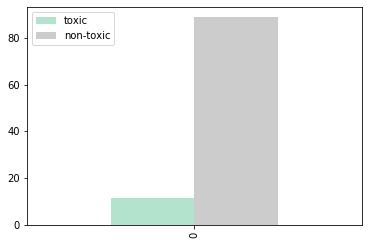

In [87]:
plt.figure(1,figsize=(10,6))
ax = percentage.plot(kind='bar', colormap='Pastel2')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Occurences of toxic vs non-toxic comments",fontsize=20)
#plt.ylabel('number of Occurrences', fontsize=15,labelpad=20)
plt.xlabel('comments', fontsize=15,labelpad=20)
plt.show()

In [88]:
train_data['text length'] = train_data['comment_text'].apply(len)

Change language abbreviations to full language name in test dataset.

In [89]:
test_data.lang.replace('es','Spanish',inplace=True)
test_data.lang.replace('it','Italian',inplace=True)
test_data.lang.replace('tr','Turkish',inplace=True)
test_data.lang.replace('ru','Russian',inplace=True)
test_data.lang.replace('fr','French',inplace=True)
test_data.lang.replace('pt','Portuguese',inplace=True)

Show how many comments are written in all the languages:

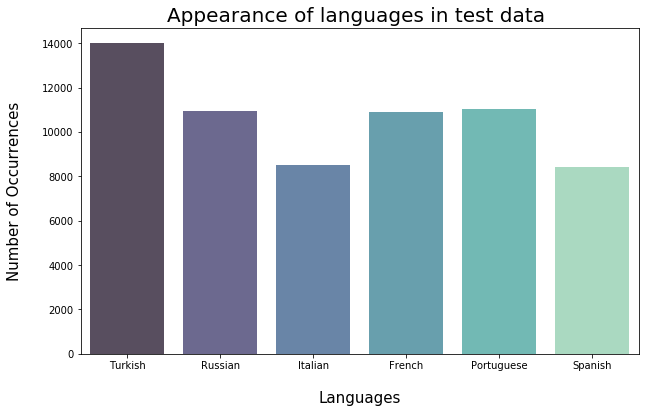

In [90]:
plt.figure(1,figsize=(10,6))
sns.countplot(test_data.lang,alpha=0.8,palette='mako')
plt.title("Appearance of languages in test data ",fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=15,labelpad=20)
plt.xlabel('Languages', fontsize=15,labelpad=20)
plt.show()

Word Occurencies:

In [91]:
data0['length'] = data0['comment_text'].apply(len)
toxic_data = data0[data0['cat_toxic'] == 1]
sevtoxic_data = data0[data0['cat_severe_toxicity'] == 1]
nontoxic=data0[data0.iloc[:,2:7].sum(axis=1)==0]

count=pd.Series(' '.join(toxic_data['comment_text']).split()).value_counts()
count=count.sort_values(ascending=False)
count_head=count.head(10)

count_head

peopl    12410
trump    11581
white    11352
like     10248
one       7797
would     7608
get       7492
black     7429
dont      6975
women     6364
dtype: int64

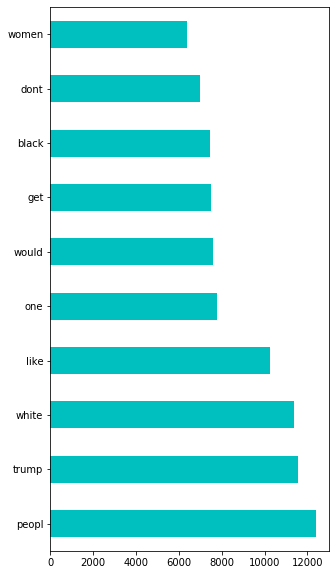

In [92]:
count_head.plot(kind = 'barh', figsize=(5,10), color='c');

Length of comments by toxicity:

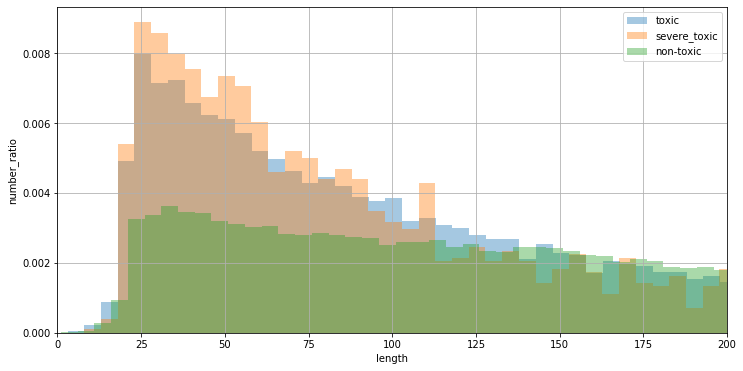

In [93]:
train_data['length'] = train_data['comment_text'].apply(len)
toxic_data = train_data[train_data['toxic'] == 1]
sevtoxic_data = train_data[train_data['severe_toxic'] == 1]
nontoxic=train_data[train_data.iloc[:,2:7].sum(axis=1)==0]

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 1000
plt.hist(toxic_data['length'], alpha = 0.4, bins=bins, label='toxic',density=True)
plt.hist(sevtoxic_data['length'], alpha = 0.4, bins=bins, label='severe_toxic',density=True)
plt.hist(nontoxic['length'], alpha = 0.4, bins=bins, label='non-toxic',density=True)
plt.xlabel('length')
plt.ylabel('number_ratio')
plt.legend(loc='upper right')
plt.xlim(0,200)
plt.grid()
plt.show()

As the graph abovr shows us, toxic comments tend to be a lot shorter than non-toxic comments. This suggests a certain imulsiveness and reactiveness in the nature of toxic comments.

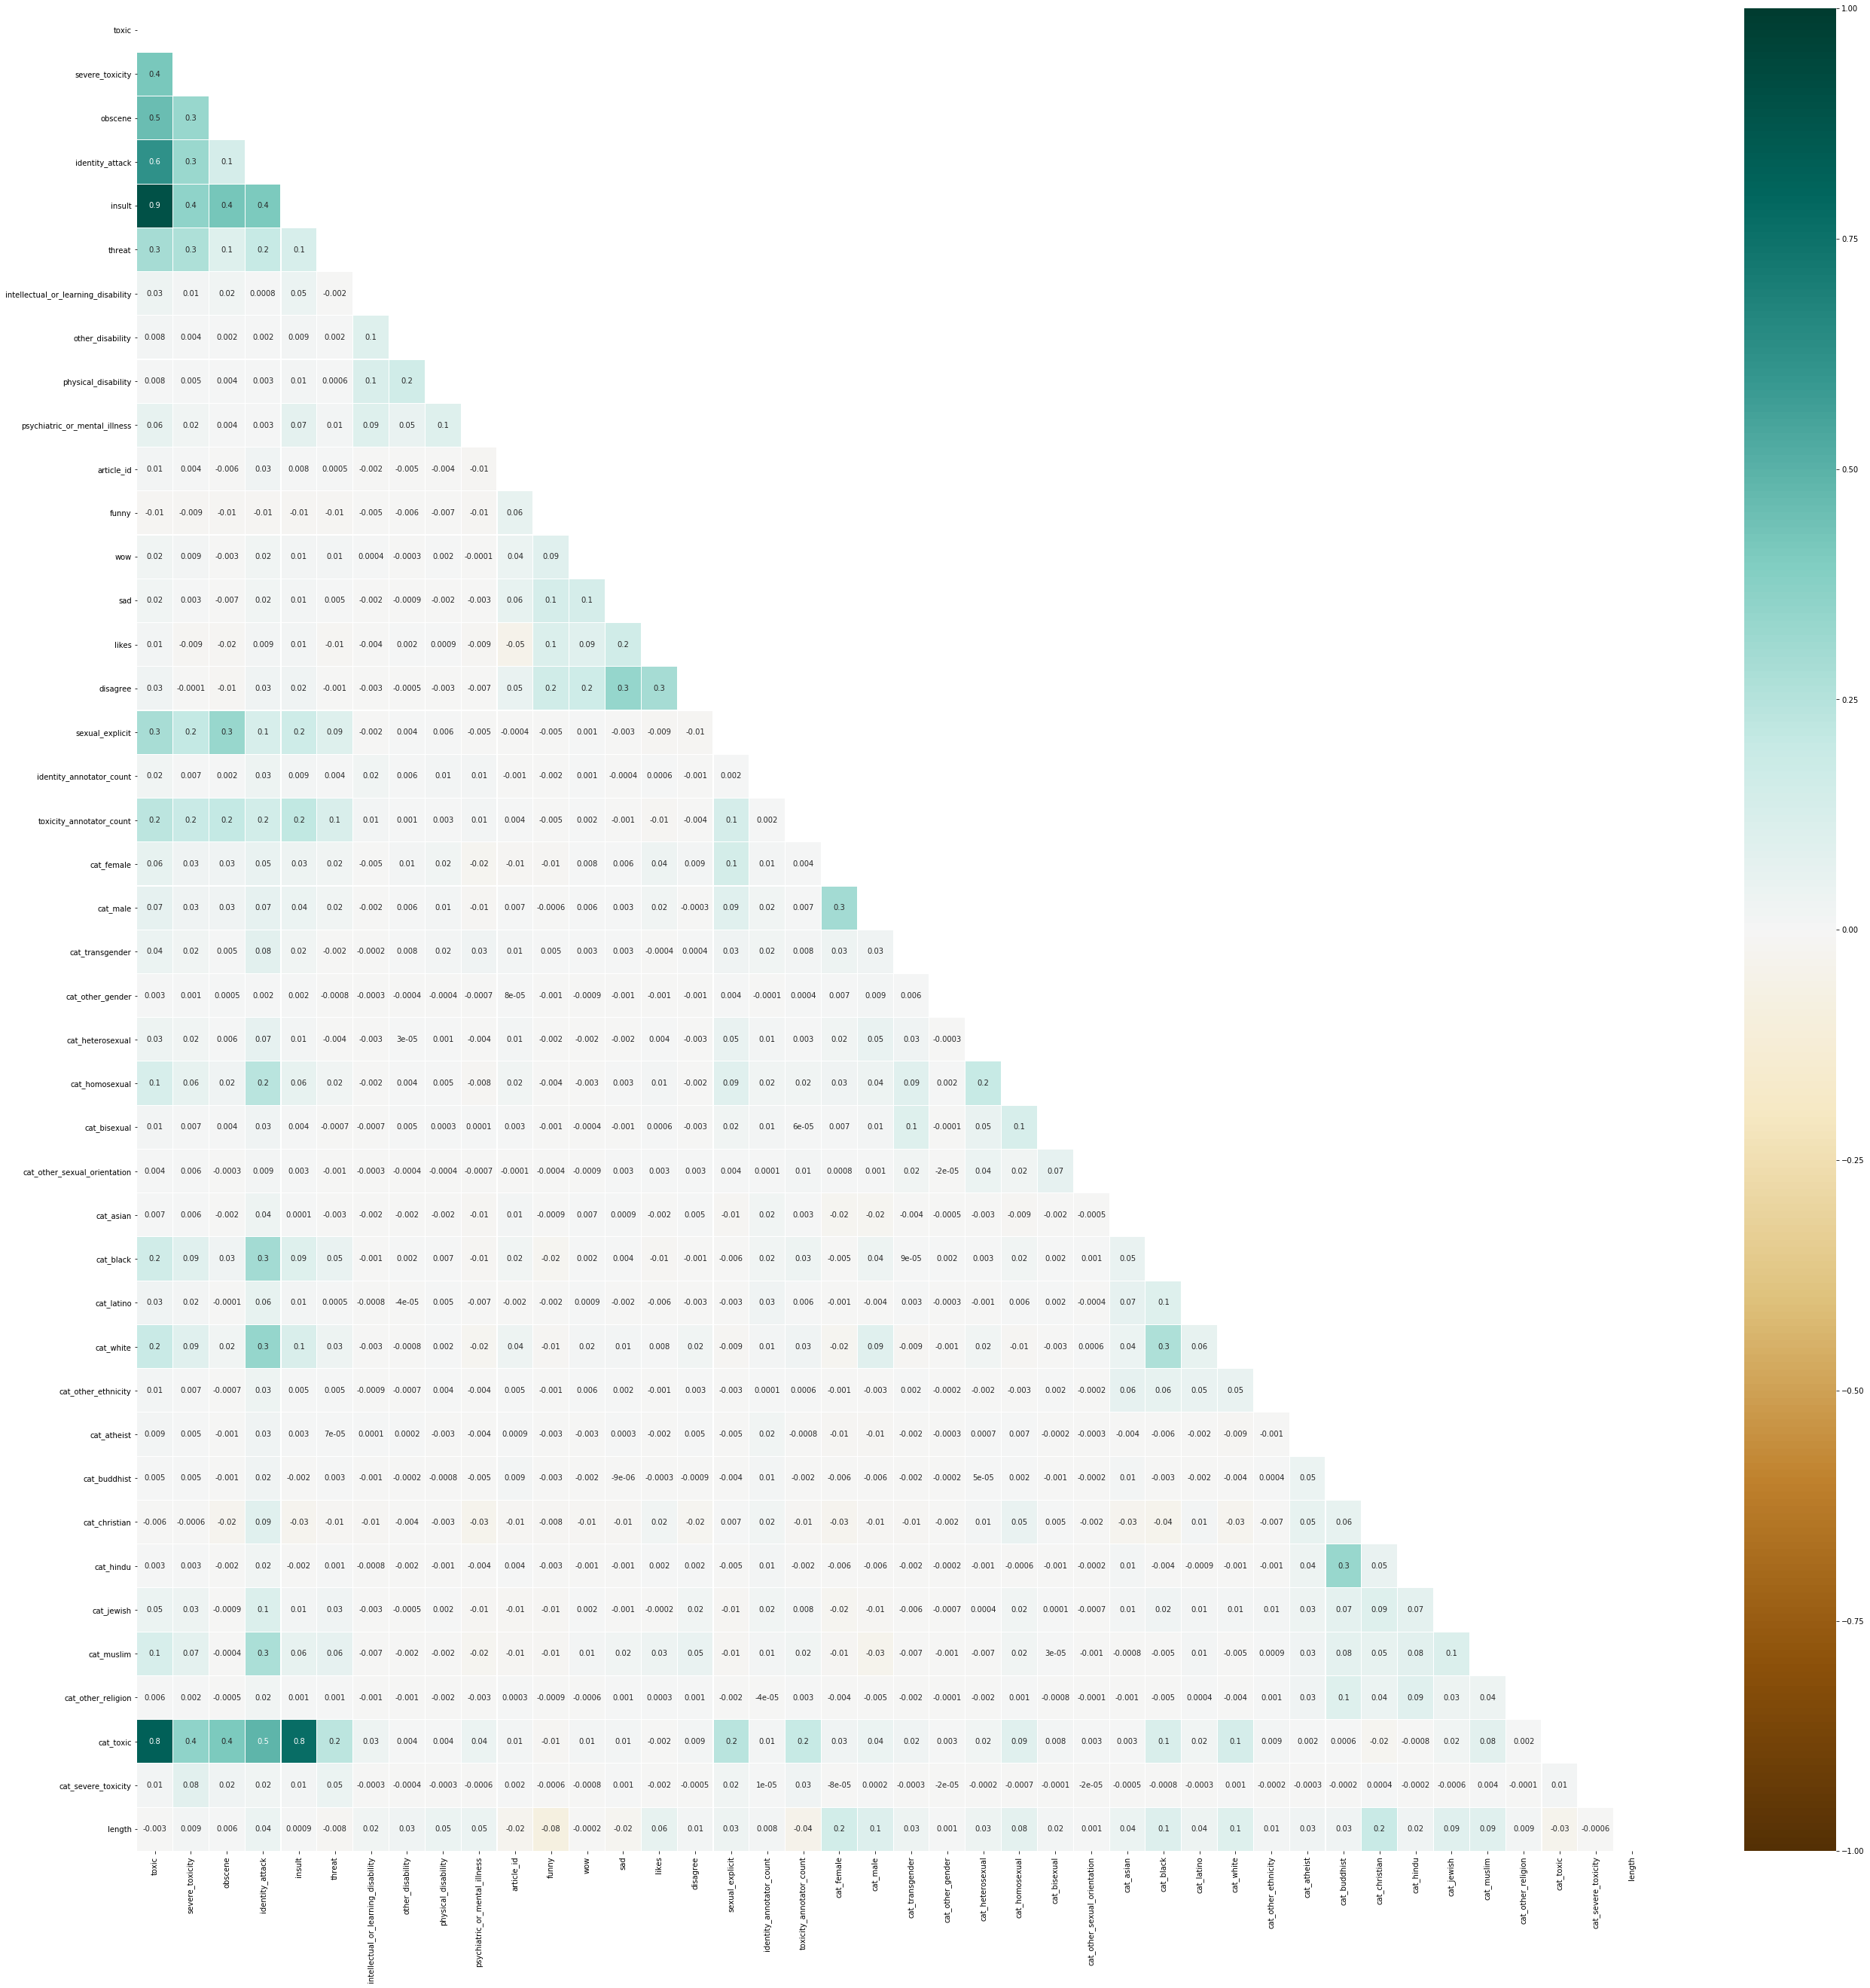

In [94]:
#create a correlation heatmap of all features
matrix = np.triu(data0.corr())
plt.subplots(figsize=(45,45))
sns.heatmap(data0.corr(),
           mask=matrix,
           annot = True,
           fmt = '.1g',
           vmin=-1, 
           vmax=1, 
           center= 0,
           cmap= 'BrBG',
           linewidth=.1
           );

According to the headmap above toxicity correlates very high (90%) with insults. 
Sexual explicit language is seemingly used more (20%) against women. 
And identity_attacks correlate higher with (20%) with muslims. 

Disagreement correlates higher with other social media rating options like funny, wow, sad, likes.

# Toxic Comment Examples

**Extract example comments from dataset**

Let's take a look on what the comments we are working with look like and read some of them. 
Please be aware, that they might use vulgar and obscene language.


In [95]:
print("A toxic comment from the data:")
print(train_data[train_data.toxic==1].iloc[67,1])

A toxic comment from the data:
Wikipedia administrators are defending a mass-murdering psychopath.


In [96]:
print("A severe toxic comment from the data:")
print(train_data[train_data.severe_toxic>=0.5].iloc[4,1])

A severe toxic comment from the data:
What a motherfucking piece of crap those fuckheads for blocking us!


In [97]:
print("An example comment including threat:")
print(train_data[train_data.threat==1].iloc[66,1])

An example comment including threat:
yeah is that youuu

oh i think it is big boi

yeah so, whoever wrote that big shit about myles, im going to come round to your shitty little house and stuff a petrol bomb through you fucking shitty little cunt of a letterbox. and yes i do know who you and your inbred parent cunts are. i know where you live. i know your parents mobile phone numbers. i know where they work. be afraid, be very afraid.

and i will find a way to stick a fat off bottle of lit jack daniels thru your door.

so fuck off

yours sincerly

the back up of myles

ps see you at 12.30 on saturday


In [98]:
print("Obscene:")
print(train_data[train_data.obscene==1].iloc[34,1])

Obscene:
"

 You Suck 

If you don't undelete the page ""Barry Dejay"" I will %$#@ you!"


In [99]:
print("identity_hate:")
print(train_data[train_data.identity_hate==1].iloc[37,1])

identity_hate:
but ew 

He was a fαg which is against nature and is the most disgusting thing. Youre not a woman are you? Sexism is wrong. Being wrong is for women.


As you can see in these example, we are dealing with some very harsh content. There is one way or another to deal with such trolls, but if you want to support a healthy online culture you have to take this phenomenon seriously. Simply ignoring them, won't do. 

In [100]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count=data.iloc[:,1:6].sum()

In [101]:
data_count = data_count.round()
data_count

toxic              195939.0
severe_toxicity      8723.0
obscene             26412.0
identity_attack     42981.0
insult             154405.0
dtype: float64

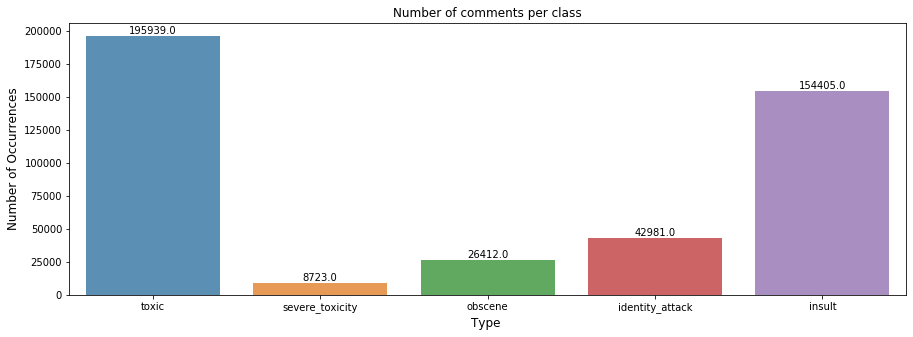

In [102]:
# Plot a chart with the following size
plt.figure(figsize=(15,5))

# Plot a bar chart using the index (category values) and the count of each category. alpha = 0.8 to make the bars more translucent
ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)

plt.title("Number of comments per class")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels for each bar
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [103]:
num_rows = len(data)
print(num_rows)

1902194


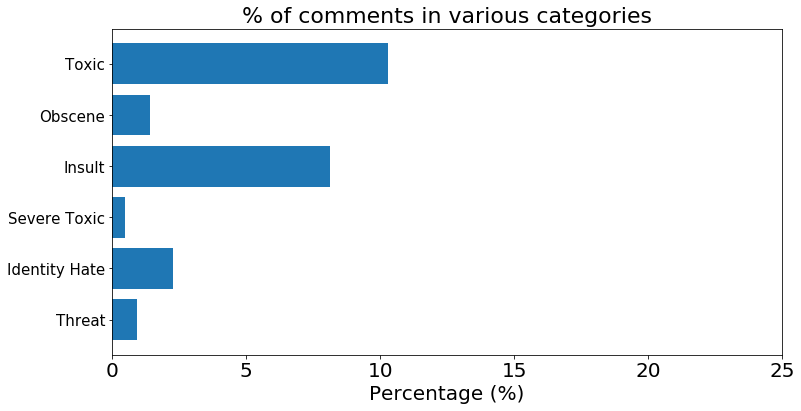

In [104]:
# Create a bar graph 
sum_tox = data['toxic'].sum() / num_rows * 100
sum_sev = data['severe_toxicity'].sum() / num_rows * 100
sum_obs = data['obscene'].sum() / num_rows * 100
sum_thr = data['threat'].sum() / num_rows * 100
sum_ins = data['insult'].sum() / num_rows * 100
sum_ide = data['identity_attack'].sum() / num_rows * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()

**Creading Word Clouds**

In [105]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="white",max_words=3000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(40,40))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'coolwarm' , random_state=244), alpha=0.98)

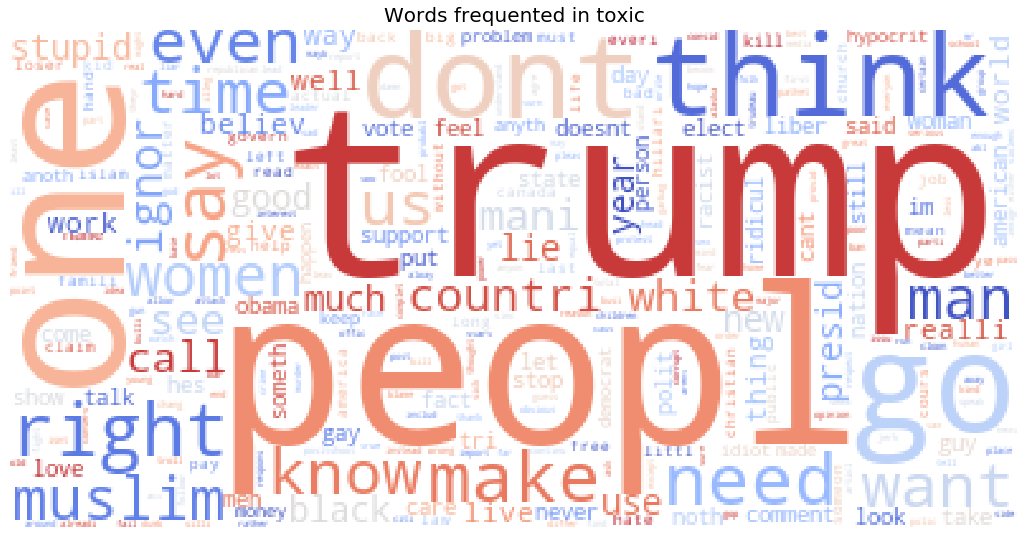

In [106]:
wordcloud(data0, 'toxic')

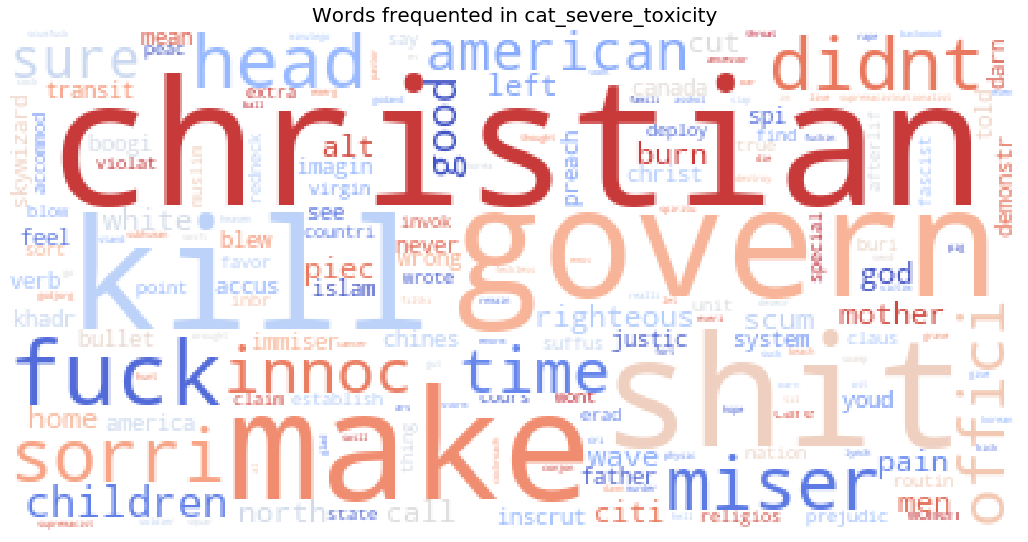

In [107]:
wordcloud(data0, 'cat_severe_toxicity')

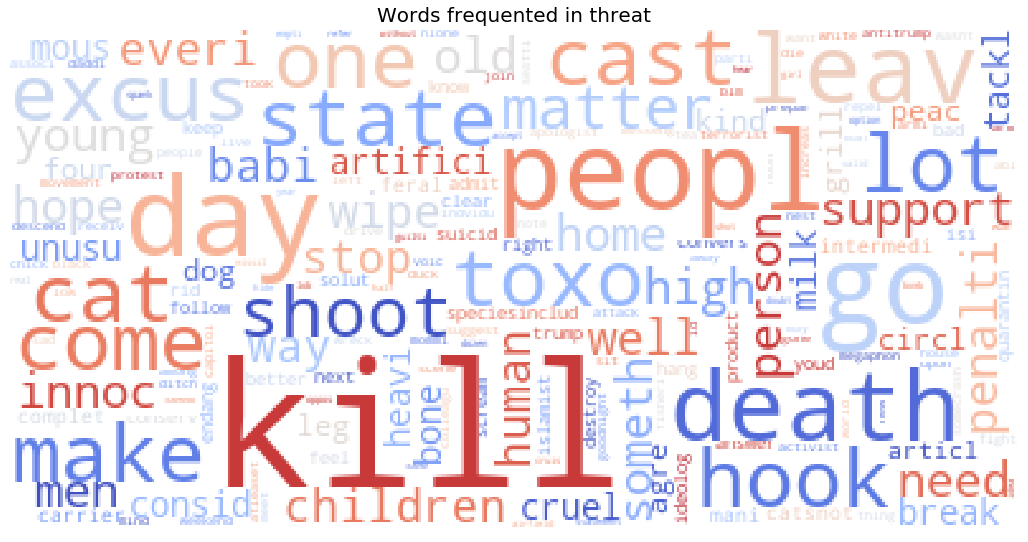

In [108]:
wordcloud(data0, 'threat')

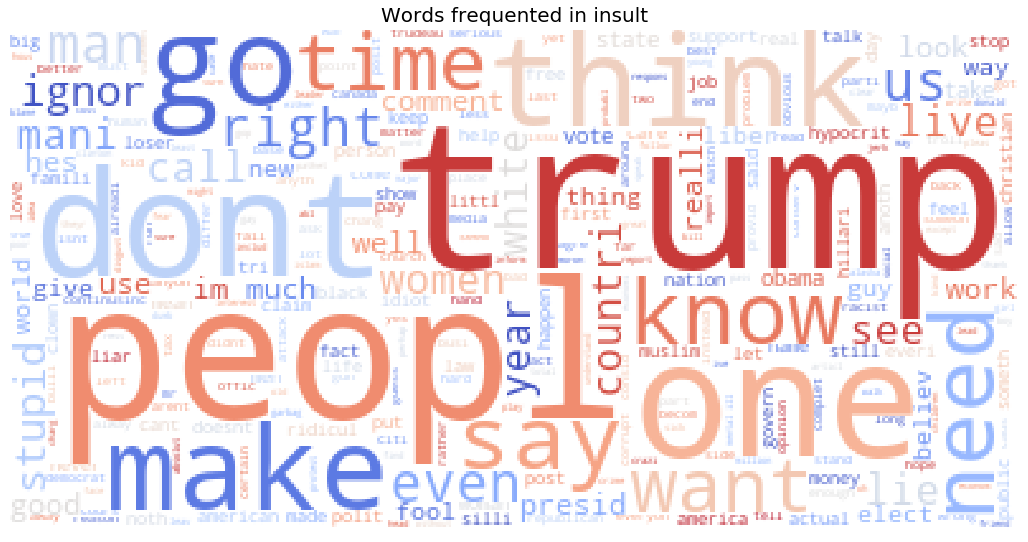

In [109]:
wordcloud(data0, 'insult')

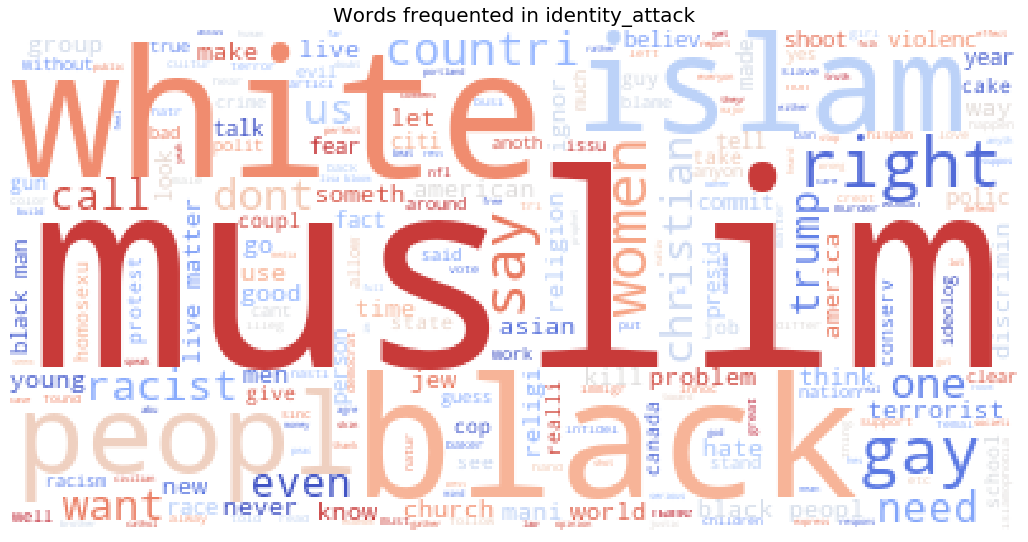

In [110]:
wordcloud(data0, 'identity_attack')

In [111]:
data2.head()

,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,cat_white,cat_other_ethnicity,cat_atheist,cat_buddhist,cat_christian,cat_hindu,cat_jewish,cat_muslim,cat_other_religion,cat_toxic
4,haha guy bunch loser,0.893617,0.021277,0.000000,0.021277,0.87234,0.0000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
11,great stori man wonder person yell shut fuck e...,0.440000,0.000000,0.293333,0.000000,0.32000,0.0000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
19,angri troll misogynist racist oh doesnt take 1...,0.500000,0.000000,0.000000,0.100000,0.50000,0.0000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
20,nice attempt tri make comment better—it feel l...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
31,yet call muslim act get pillori okay smear ent...,0.912500,0.050000,0.237500,0.612500,0.88750,0.1125,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,1


In [112]:
x = data.groupby('toxic')['comment_text'].min()
x.tail(20)

toxic
0.990396    DOGS----\nEAT\nSHIT\nSLEEP\nBARK\n\nNIGERS\nEA...
0.990483                 Victimitis: You are such an asshole.
0.990623                  Yes. Kill them before they kill us.
0.990741              garbage like you should be incinerated!
0.990751       HilLIARy is a bitch and Michelle O is a tranny
0.990754      Piece of shit post from a piece of shit poster.
0.991084         Go fuck your dog up his ass, you stupid cat.
0.991327                                       STUPID NIGGERS
0.991488           Stupid hispanics, ruining it for everyone.
0.991914    yes, they are stupid.  Low IQ more like it.  U...
0.992177      we'll beat your ass and cut your throat maggot.
0.992215                           this report is gay as fuck
0.992780                                    you fucking idiot
0.993023                   shut the fuck up you peace of shit
0.993531    Fuck u Donald trump\n On my way! Come get me y...
0.993660    Only a fuckin nigger would do something like t...
0.

# Who is at the highest risk of hate and discrimination?

Identifying high risk groups for toxic/severe toxic/insult/threat/obscene/explicit sexual:

In [113]:
#groupbys to identify high-risk groups
# logistic regression to identify determinants of toxicity  

Create a parallel categories plot to showcase attributes of groups that are highly associated with toxic comments:

In [116]:
#sort values for toxicity
data0_sorted= data0.sort_values(by='toxic',
                      axis=0,
                      ascending=False,
                      )

In [117]:
p = np.percentile(drug_risk.hard_score, 90) # return 90th percentile
print(p)
3.0

NameError: name 'drug_risk' is not defined

In [118]:
#take 25% of highest scoring toxic comments cases
data0['toxic'].describe()

count    426707.000000
mean          0.140176
std           0.218470
min           0.000000
25%           0.000000
50%           0.000000
75%           0.200000
max           1.000000
Name: toxic, dtype: float64

Note: This plot is over 90MB in size.

In [120]:
import plotly.express as px

#df = data0_sorted
#fig = px.parallel_categories(
#    df,
#    dimensions=['Gender', 'Sex_Orientation', 'Ethnicity', 'Religion'],
#    color="toxic",
#    color_continuous_scale=px.colors.sequential.Inferno,
#    labels={
#        'Gender': 'gender',
#        'Sex_Orientation': 'sexual orientation',
#        'Ethnicity': 'ethnicity',
#        'Religion': 'religion',
#    })
#fig.show()